<a href="https://colab.research.google.com/github/ashleighperez/DS3010_A/blob/srisaranya/Case_Studies/CaseStudy3_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 3 : Textual analysis of movie reviews

**Due Date: December 5, 2023, BEFORE the beginning of class at 12:00pm ET**

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*o-qaS9WPD9ocA9Ofr85v5g.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

  Ashleigh Perez
    
  Diana Binney
    
  Srisaranya Pujari

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:**
* This case study will be based upon the scikit-learn Python library
* We will build upon the tutorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* In particular, this case study is quite similar to "Exercise 2: Sentiment Analysis on movie reviews" on the above web page.
* Read about deep learning at https://scikit-learn.org/stable/modules/neural_networks_supervised.html


**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org).
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Getting the data onto Colab example.

In [2]:
! wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2023-12-01 07:13:25--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  1.68MB/s    in 1.8s    

2023-12-01 07:13:28 (1.68 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



Look for the directory txt_sentoken

In [3]:
! tar xzf review_polarity.tar.gz
! ls

poldata.README.2.0  review_polarity.tar.gz  sample_data  txt_sentoken


## Problem 1 (10 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Installing scikit-learn using Anaconda does not necessarily download the example source-code.
* Accordingly, you may need to download these directly from Github at https://github.com/scikit-learn/scikit-learn:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* Here is a direct link to the code to help you out:  https://github.com/scikit-learn/scikit-learn/tree/main/doc/tutorial/text_analytics
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involve moving around data files and/or small modifications to the script.

n_samples: 2000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.02
              precision    recall  f1-score   support

         neg       0.85      0.85      0.85       234
         pos       0.87      0.87      0.87       266

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

[[200  34]
 [ 34 232]]


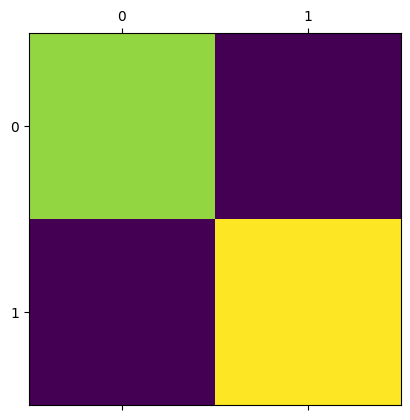

In [21]:
#----------------------------------------------
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import pandas as pd


if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    movie_reviews_data_folder = "txt_sentoken"
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

    import matplotlib.pyplot as plt
    plt.matshow(cm)
    plt.show()

## Problem 2 (10 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.**
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [22]:
#----------------------------------------------

# The term frequency-inverse document frequency or TF-IDF statistic is the product of the term frequency statistic
# (or how many times a term appears in a document) and the inverse document frequency statistic (or how much information the term provides).
# Information via https://en.wikipedia.org/wiki/Tf%E2%80%93idf

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs_train)
vectorizer.get_feature_names_out()

vectorizer.min_df # min = 1 (default value)
# min_df means if the term appears in the document an amount of times less than the entered or default value (in proportion or in absolute counts) to the document then it will be ignored
# Information via https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

vectorizer.max_df # max = 1.0 (default value)
# max_df means if the term appears in the document an amount of time greater than the entered or default value (in proportion or in absolute counts) to the document then it will be ignored
# Information via https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

1.0

## Problem 3 (15 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn
    * LinearSVC
    * KNeighborsClassifier
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [23]:
#----------------------------------------------
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

vectorizer.fit(docs_train)

Xtrain = vectorizer.transform(docs_train)
Xtest = vectorizer.transform(docs_test)

#testing data on LinearSVC
print('LinearSVC:')
clf = LinearSVC()

start_t = time.time()
clf.fit(Xtrain, y_train)
end_t = time.time()
print(f"\nTook {(end_t - start_t):.3f} seconds to train")

y_pred = clf.predict(Xtest)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

#testing data on KNeighborsClassifier - it had an accuracy 0.248 lower than LinearSVM, so it is commented out
#print(f'\nKNeighborsClassifier:')
#clf = KNeighborsClassifier()

#start_t = time.time()
#clf.fit(Xtrain, y_train)
#end_t = time.time()
#print(f"\nTook {(end_t - start_t):.3f} seconds to train")

#y_pred = clf.predict(Xtest)
#print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

#Analyzing LinearSVM - start by creating a dataframe of misclassified instances
import pandas as pd

misclassified_df = pd.DataFrame({
    'Text': docs_test,
    'True Label': y_test,
    'Predicted Label': y_pred
})
misclassified_df = misclassified_df[misclassified_df['True Label'] != misclassified_df['Predicted Label']]

#print first 2 rows
misclassified_df.head(2)

#it seems these are negative reviews are misclassified as positive because of their sarcasm, if I had to take a guess.
#they seem pretty obviously negative, but of course, the model is not perfect


LinearSVC:

Took 0.076 seconds to train
Accuracy: 0.862


,Text,True Label,Predicted Label
14,b'let me open this one with a confession : i l...,1,0
17,b'has it really been two decades since walter ...,0,1


## Problem 4 (15 points): Using pre-trained models trained from Hugging Face






#### Installing some necessary packages for this problem

In [24]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install transformers[torch]
!pip install evaluate

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00


#### **Checking That The Notebook Has a GPU.**

#### **This is very important, as the fine-tuning will take very long, or the notebook may even crash, without having a GPU. Do not continue with the rest of problem 4 without seeing "Sucess!" in the printout from the cell below.**

In [25]:
import torch

if torch.cuda.is_available():
      device = torch.device("cuda:0")
      print(f"Success!\nUsing GPU: ({torch.cuda.get_device_name(device=device)})")
else:
      print("\nNo GPU found.\n\nDO NOT CONTINUE TO PROBLEM 4 or 5 UNTIL YOU SEE \"Success!\" PRINTED OUT.\n\nDo the following:\n1. Save your colab file.\n2. Click on Runtime -> Change runtime type -> T4 GPU -> OK (Don't worry about losing progress if the runtime needs to restart, we just saved the file in step #1) -> Save.\n3. Wait 5-10 sec.\n5. Click on Runtime -> View Resources. You should see \"GPU RAM\" as one of the charts.\n5. Rerun this cell.")
      device = torch.device("cpu")


Success!
Using GPU: (Tesla T4)


### 1. Using Hugging Face Models "Off-The-Shelf"

Go to [hugging face's model hub](https://huggingface.co/models) and search for a sentiment model.

Can you find one for reviews, movies, or something else that fits the problem well?

Only use models that have the following:
- Have summary statistics of its performance on a test or validation dataset  
- Have a python API (you should see a window for it at the bottom of the page)
- Take **RAW TEXT** (not the vectorized words) as input into the model
- Output **POSITIVE** or **NEGATIVE** (if its output is pos/neg/neutral, this is fine, but you will need to transform this output to only pos/neg and described how you handle **neutral** outputs)

Report the url of the model's page you found in the box below.

In the code cell below, evaluate the performance of your chosen pre-trained model on the v2.0 polarity dataset. What's the accuracy, F1 Score, and other metrics.




####URL TO MODEL PAGE: _________________
####Hugging Face Reported TEST/VALIDATION PERFORMANCE: _________________
####v2.0 Polarity Dataset TEST PERFORMANCE: _________________

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


### 2. Using A PyTorch Model From Hugging Face

Here, we will be using a movie sentiment model made by JamesH. The model card can be found [here](JamesH/Movie_review_sentiment_analysis_model).

Report the url of the model's page you found in the box below.

In the code cells below, evaluate the performance of your chosen pre-trained model on the v2.0 polarity dataset. What's the accuracy, F1 Score, and other metrics?

####URL TO MODEL PAGE: _________________
####Hugging Face Reported TEST/VALIDATION PERFORMANCE: _________________
####v2.0 Polarity Dataset TEST PERFORMANCE: _________________

####Loading the model

In [ ]:
james_h_model = AutoModelForSequenceClassification.from_pretrained("JamesH/autotrain-third-project-1883864250")
james_h_tokenizer = AutoTokenizer.from_pretrained("JamesH/autotrain-third-project-1883864250")

#### Example API of how to interface with the JamesH model

In [5]:
input_phrase = "That movie wasn't good. For several reasons. Firstly, there isn't anything special about it"
with torch.no_grad():
  inputs = james_h_tokenizer(input_phrase, return_tensors="pt")
  outputs = james_h_model(**inputs)
  print(outputs)
  # Output is a tuple containing the logits of the positive and negative predictions
  # We need to convert these to probabilities
  logits = outputs["logits"]
  odds = torch.exp(logits)
  probabilities = odds / (1 + odds)
  print(probabilities)
  # Lets make it look more readable
  positive = probabilities[0,0]
  negative = probabilities[0,1]
  print("\n")
  print(f"Phrase: {input_phrase}\nPositive: {positive:.3f}\nNegative: {negative:.3f}")

  if positive > 0.5:
    print(f"The phrase has positive sentiment")
  else:
    print(f"The phrase has negative sentiment")

NameError: ignored

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

### 3. Fine-tuning a Pre-Trained Model On Our Dataset

Here, we will be using the JamesH model as the starting point of training a new model that's trained specifically for our dataset

You will be tasked with finding hyperparameters to use during the fine-tuning process that improves the original model's performance.

Then you will report the new model performance on the fine-tuned model.

In [6]:
import os
import pandas as pd
import random
import datasets
import numpy as np
import evaluate

df_train = pd.DataFrame(columns=['label', 'text'])
df_test = pd.DataFrame(columns=['label', 'text'])

pos_reviews = []
neg_reviews = []

# Getting all positive reviews from disk
for filename in os.listdir("./txt_sentoken/pos"):
    with open(f"./txt_sentoken/pos/{filename}", "r") as f:
        pos_reviews.append(f.read())

# Getting all negative reviews from disk
for filename in os.listdir("./txt_sentoken/neg"):
    with open(f"./txt_sentoken/neg/{filename}", "r") as f:
        neg_reviews.append(f.read())

# Randomly shuffle both lists for splitting into training and test sets
random.shuffle(pos_reviews)
random.shuffle(neg_reviews)

# Add each review into the dataset variable
# This dataset format is compatible for most Hugging Face wrappers in PyTorch
test_percentage = 0.2

for i in range(len(neg_reviews)):
  temp = {}
  temp["label"] = 0
  temp["text"] = neg_reviews[i]
  temp = pd.DataFrame(temp, index=[0])
  if i < int(len(neg_reviews) * test_percentage):
    df_test = pd.concat([df_test, temp], ignore_index = True)
    df_test.reset_index()
  else:
    df_train = pd.concat([df_train, temp], ignore_index = True)
    df_train.reset_index()

for i in range(len(pos_reviews)):
  temp = {}
  temp["label"] = 1
  temp["text"] = pos_reviews[i]
  temp = pd.DataFrame(temp, index=[0])
  if i < int(len(pos_reviews) * test_percentage):
    df_test = pd.concat([df_test, temp], ignore_index = True)
    df_test.reset_index()
  else:
    df_train = pd.concat([df_train, temp], ignore_index = True)
    df_train.reset_index()


dataset_train = datasets.Dataset.from_pandas(df_train)
dataset_test = datasets.Dataset.from_pandas(df_test)


def tokenize_function(examples):
    return james_h_tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train = dataset_train.map(tokenize_function, batched=True)
tokenized_test = dataset_test.map(tokenize_function, batched=True)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

FileNotFoundError: ignored

### See the [documentation](https://huggingface.co/transformers/v3.0.2/main_classes/trainer.html#transformers.TrainingArguments) what different hyperparameters can be adjusted for the fine-tuning.

### Play around with different parameters, specifically with:
- learning rate
- weight decay
- max gradient norm
- adam epsilon
- num_train_epochs


What happens when you change them? Does the fine-tuning take shorter? Longer? Does the performance improve or worsen? Try a few different configurations, record the results, and hypothesize (or if you can, explain!) the reason why theses hyperparameter changes had the observed effect.  

*Note: Do NOT change the **output_dir** or **use_cpu** or **evalulation_strategy** variables.*  





In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
#   See https://huggingface.co/transformers/v3.0.2/main_classes/trainer.html#transformers.TrainingArguments

training_args = TrainingArguments(output_dir="finetuned_movie_sentiment", use_cpu=False, evaluation_strategy="epoch", )

#----------------------------------------------

trainer = Trainer(
    model=james_h_model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    compute_metrics=compute_metrics,
)


trainer.train()

In the code cell below, evaluate the performance of your chosen pre-trained model on the v2.0 polarity dataset. What's the accuracy, F1 Score, and other metrics.

In [ ]:
james_h_finetuned_model = AutoModelForSequenceClassification.from_pretrained("./finetuned_movie_sentiment/checkpoint-500")

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


## Problem 5 (10 points): Accuracy is not everything!  How fast are the algorithms versus their accuracy?
**Compare the runtime of your  baseline algorithms to the runtime of the pre-trained Hugging Face model and the fine-tuned Hugging Face model**

**The jupyter command %timeit can be used to measure how long a calculation takes https://ipython.readthedocs.io/en/stable/interactive/magics.html.**
* How long does it take to run the "predict" function on the entirety of v2.0 polarity dataset on the Sci-Kit Learn models and the Hugging Face models? Can you explain why? Make a table showing your results.
* Which method has the best ability in predicting the sentiment correctly? Can you explain why?

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


## Problem 6 (20 points): Business question

* Suppose you had a machine learning algorithm that could detect the sentiment of tweets that was highly accurate.  What kind of business could you build around that?
* Who would be your competitors, and what are their sizes?
* What would be the size of the market for your product?
* In addition, assume that your machine learning was slow to train, but fast in making predictions on new data.  How would that affect your business plan?
* How could you use the cloud to support your product?

In [7]:
#A potential business that could be built with such an algorithm is to predict the success/failure of a celebrity's endeavors based
#on the public's opinion of them. For example, if an artist were to drop an album, would it be a success or a flop? Do people care
#about this celebrity? If the public is neutral, no one cares enough to listen. Negative sentiment may lead to boycotts and such, but
#positive will mean success for the artist.

#Competitors would be celebrity management agencies, with sizes of ____

#Market size would be ___

#If the machine was slow to train but fast in predicting new data, I'd probably spend a lot more time fine-tuning and training the
#model before deploying it. I'd spend time advertising the upcoming model while it is training so that I don't have any idle minutes.

#Because of the sheer volume of incoming tweets all the time, the cloud is required to keep track of all of the incoming tweets so that
#the model may run continuously to analyze the ever-shifting sentiment of the public.

# Slides (for a 5-8 minute presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you.

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set!

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study.

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected?
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data?

     (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through canvas.wpi.edu

### DS3010 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Total Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 10
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 10
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 15
    -----------------------------------
  
    -----------------------------------
    Question 4:  
    Points: 15
    -----------------------------------

    -----------------------------------
    Question 5:  
    Points: 10
    -----------------------------------

    -----------------------------------
    Question 6:  
    Points: 20
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for a 5-8 minute presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5

2. Communicating Results (figure/table)
    Points: 10

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5
